##### Model Selection: We use RandomForestRegressor as an example.
##### Model Training: The model is trained on the training dataset using model.fit()
#### Model Evaluation: We evaluate the model on the test dataset using Mean Absolute Error (MAE) and R-squared (R²) as performance metrics.
#### Hyperparameter Tuning: We use GridSearchCV to find the best hyperparameters for the Random Forest model.
#### Prediction: We use the model to make predictions on new data (after training).
#### Feature Importance Plot: We plot the top 10 most important features from the Random Forest model.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('preprocessed_dataset.csv')
data.head()

,index,soil_moisture,soil_temperature,454,458,462,466,470,474,478,...,930,934,938,942,946,950,year,month,day,hour
0,0.0,33.51,34.8,-0.820790,-0.933076,-0.911946,-0.918558,-0.895983,-0.937692,-0.916785,...,-0.844442,-0.848906,-0.847418,-0.852499,-0.864668,-0.841753,2017,5,23,14
1,1.0,33.49,35.2,-0.913318,-0.962229,-0.968456,-0.940140,-0.942926,-0.914833,-0.937676,...,-0.878898,-0.883832,-0.864402,-0.819999,-0.794575,-0.770620,2017,5,23,14
2,2.0,33.46,35.4,-0.874888,-1.030703,-0.966399,-0.942754,-0.956636,-0.964497,-0.940893,...,-0.855017,-0.851385,-0.823587,-0.819934,-0.828697,-0.827617,2017,5,23,14
3,3.0,33.33,35.0,-0.965790,-0.981437,-0.972359,-0.918834,-0.934312,-0.918411,-0.906604,...,-0.852920,-0.851014,-0.828813,-0.810390,-0.758144,-0.742757,2017,5,23,14
4,4.0,33.32,35.3,-0.896976,-0.961759,-0.956435,-0.953026,-0.925257,-0.906755,-0.911004,...,-0.843084,-0.825724,-0.800567,-0.786257,-0.783971,-0.784635,2017,5,23,14


In [7]:
X = data.drop(columns=['soil_moisture'])
y = data['soil_moisture']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-Sqaured (R2): {r2}')

Mean Absolute Error (MAE): 0.2101110294117649
R-Sqaured (R2): 0.9742767237573295


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10)
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from random search
print(f"Best Parameters: {random_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 125}


In [25]:
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 125}


In [29]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [33]:
y_pred_best = random_search.best_estimator_.predict(X_test)

In [35]:
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [37]:
print(f'After Tuning - MAE: {mae_best}')
print(f'After Tuning - R2: {r2_best}')

After Tuning - MAE: 0.21769569676981684
After Tuning - R2: 0.9727040428230102


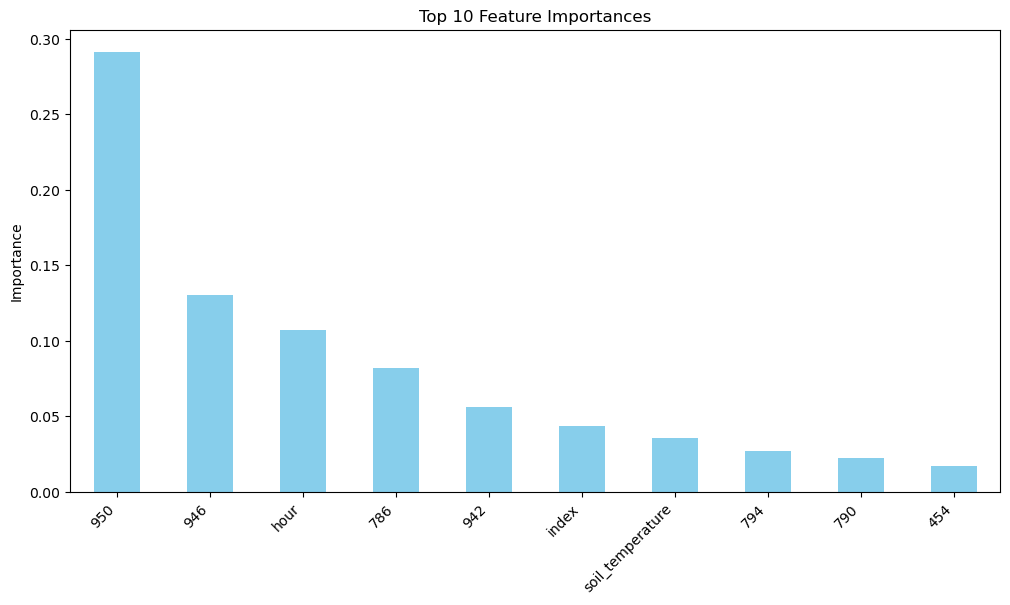

In [39]:
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.head(10).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()